# Principal Component Analysis (PCA)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset= pd.read_csv('Wine.csv')
X= dataset.iloc[:, : -1].values
y= dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.2)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## Applying PCA

In [5]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_train= pca.fit_transform(X_train)
X_test= pca.transform(X_test)

## Training the Logistic Regression model on the Training set

In [6]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit( X_train, y_train)

LogisticRegression()

## Making the Confusion Matrix

In [7]:
y_pred= lr.predict( X_test)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 12  0]
 [ 0  1  9]]


0.9722222222222222

## Visualising the Training set results

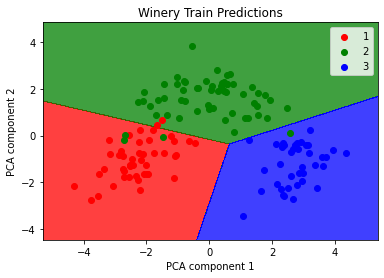

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set= X_train, y_train
X1, X2= np.meshgrid(np.arange(start= X_set[:, 0].min()-1, stop= X_set[:, 0].max()+1, step=0.01),
        np.arange(start= X_set[:, 1].min()-1, stop= X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap= ListedColormap(('red','green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[ y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('Winery Train Predictions')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.legend()
plt.show()

## Visualising the Test set results

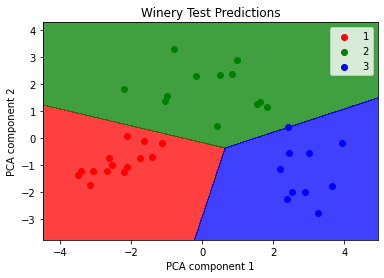

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set= X_test, y_test
X1, X2= np.meshgrid(np.arange(start= X_set[:, 0].min()-1, stop= X_set[:, 0].max()+1, step=0.01),
        np.arange(start= X_set[:, 1].min()-1, stop= X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap= ListedColormap(('red','green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[ y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('Winery Test Predictions')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.legend()
plt.show()